**(OpenAlex) Extracted API Data Analysis Dashboard**
This analysis project uses the finalized, feature-extracted data obtained through the (OpenAlex) API extraction pipeline and aggregates to obtain the Top 10 published concepts and publications per year (per top concept), as well as plotted visualizations. The OpenAlex Database has recently release a major new database version called "Walden" in late 2025  


To start the analysis, one imports the required packages and initializes the file path and data

In [3]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt


PROJECT_ROOT = Path().resolve()
FINAL_FILE = PROJECT_ROOT / "data" / "final" / "API_data_final.csv"
df = pd.read_csv(FINAL_FILE)

In [ ]:
#Ensure publication_year is numeric
df['publication_year'] = pd.to_numeric(df['publication_year'], errors='coerce')


#Get Top 10 concepts table

all_concepts = df['concepts'].dropna().str.split(',').explode()
concept_counts = all_concepts.value_counts()
top_10_concepts = concept_counts.head(10)

print("Top 10 most frequent concepts:")
display(top_10_concepts.to_frame(name='Count'))  #Generate Jupyter table

#Publications per year table (Total + Top 10 concepts)


#Explode concepts column
df_exploded = df.dropna(subset=['concepts']).copy()
df_exploded = df_exploded.assign(concept=df_exploded['concepts'].str.split(',')).explode('concept')

#Filter only top 10 concepts
df_top = df_exploded[df_exploded['concept'].isin(top_10_concepts.index)]

#Group by year and concept
pubs_per_year_concept = df_top.groupby(['publication_year', 'concept']).size().unstack(fill_value=0)

#Add total publications per year
pubs_total = df['publication_year'].value_counts().sort_index()
pubs_per_year_concept['Total'] = pubs_total

#Sort by year
pubs_per_year_concept = pubs_per_year_concept.sort_index()
pubs_per_year_concept = pubs_per_year_concept[pubs_per_year_concept.index >= 1925]

#Display table
print("\nPublications per Year (Top 10 Concepts + Total):")
display(pubs_per_year_concept)

Top 10 most frequent concepts:


,Count
concepts,
Biology,106299
Computer science,94290
Medicine,84308
Physics,64535
Chemistry,60332
Mathematics,51950
Psychology,49305
Internal medicine,45113
Engineering,40329



Publications per Year (Top 10 Concepts + Total):


concept,Biochemistry,Biology,Chemistry,Computer science,Engineering,Internal medicine,Mathematics,Medicine,Physics,Psychology,Total
publication_year,,,,,,,,,,,
1925,2,10,8,11,0,4,7,8,9,5,38
1926,4,10,12,17,6,0,13,6,29,11,64
1927,2,10,4,15,2,2,13,7,17,7,51
1928,0,9,6,18,9,3,23,7,29,9,65
1929,0,6,7,17,3,2,4,8,28,11,62
...,...,...,...,...,...,...,...,...,...,...,...
2021,220,816,409,739,430,533,223,949,319,195,2250
2022,127,415,156,412,203,230,136,420,172,89,1094
2023,33,171,48,240,88,95,65,176,85,62,498


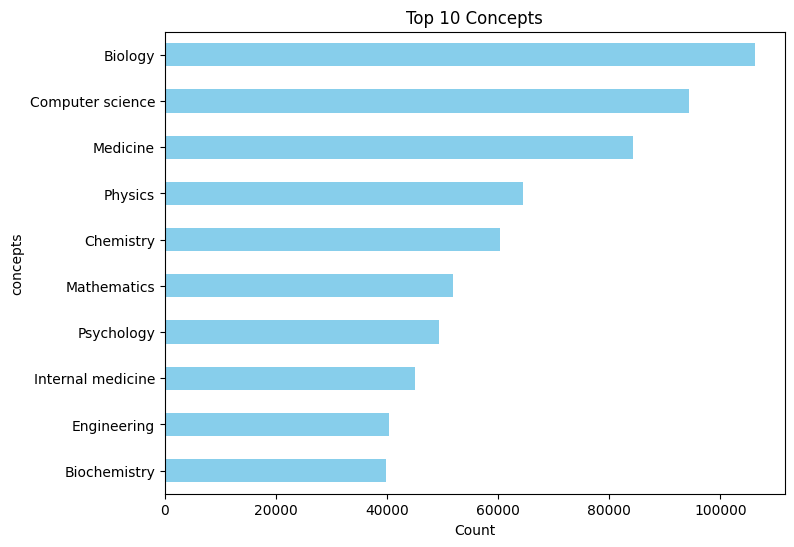

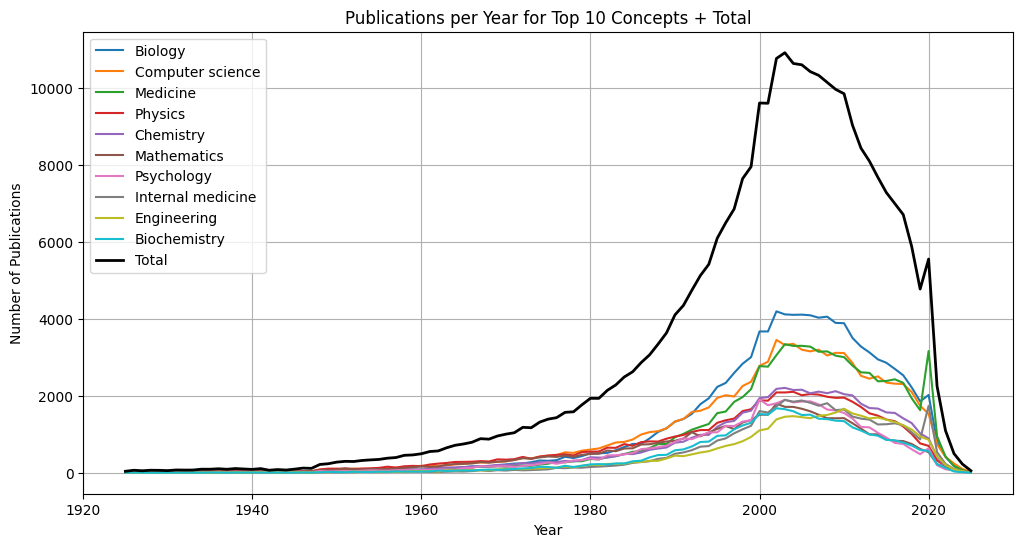

In [ ]:
#Plots

#Top 10 concepts bar chart
plt.figure(figsize=(8,6))
top_10_concepts.plot(kind='barh', color='skyblue')
plt.title("Top 10 Concepts")
plt.xlabel("Count")
plt.gca().invert_yaxis()
plt.show()

#Publications per year for Top 10 Concepts + Total
plt.figure(figsize=(12,6))
for concept in top_10_concepts.index:
    plt.plot(pubs_per_year_concept.index, pubs_per_year_concept[concept], label=concept)

#Add total publications line
plt.plot(pubs_per_year_concept.index, pubs_per_year_concept['Total'], color='black', linewidth=2, label='Total')

plt.title("Publications per Year for Top 10 Concepts + Total")
plt.xlabel("Year")
plt.ylabel("Number of Publications")
plt.legend()
plt.grid(True)
plt.show()
